In [4]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
user = "root"
password = ""
host = "localhost"
port = "3306"
database = "norp"

In [7]:
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

In [11]:
query = """
    SELECT nccs_level_1_category, COUNT(*) AS count
    FROM nccs_bmf
    WHERE nccs_level_1_category IS NOT NULL
    GROUP BY nccs_level_1_category
    ORDER BY count DESC;
"""

df = pd.read_sql(query, engine)

/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/4216703982.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='count', y='nccs_level_1_category', palette="viridis")


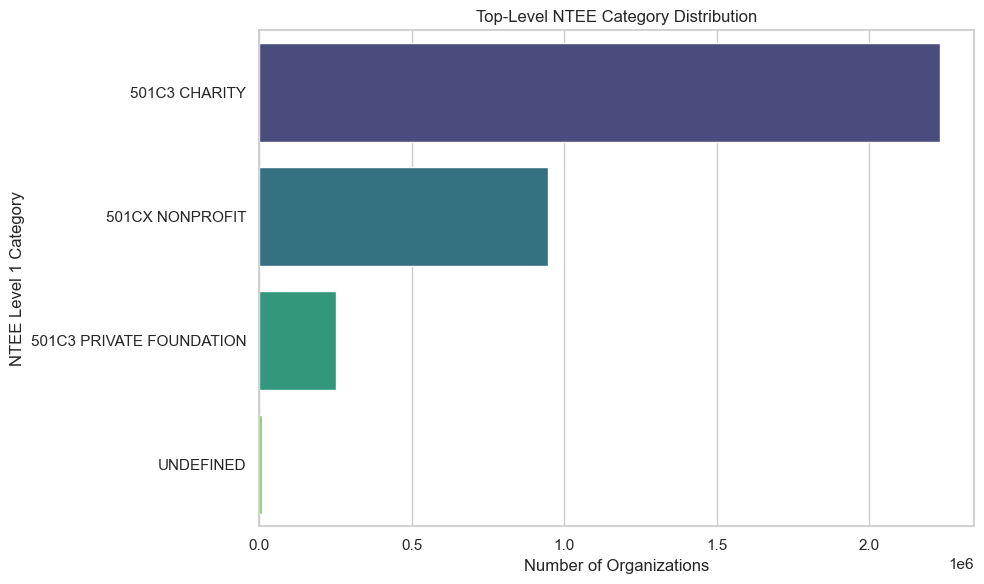

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='count', y='nccs_level_1_category', palette="viridis")
plt.title("Top-Level NTEE Category Distribution")
plt.xlabel("Number of Organizations")
plt.ylabel("NTEE Level 1 Category")
plt.tight_layout()
plt.show()

In [13]:
# Run SQL query to count orgs by ruling year
query = """
    SELECT YEAR(organization_ruling_date) AS ruling_year, COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE organization_ruling_date IS NOT NULL
    GROUP BY ruling_year
    ORDER BY ruling_year;
"""
df_ruling_year = pd.read_sql(query, engine)

# Display the DataFrame to inspect it
df_ruling_year.head(10)

,ruling_year,org_count
0,1900,612
1,1901,17
2,1902,2
3,1903,10
4,1904,22
5,1905,13
6,1906,3
7,1907,6
8,1908,19
9,1909,2


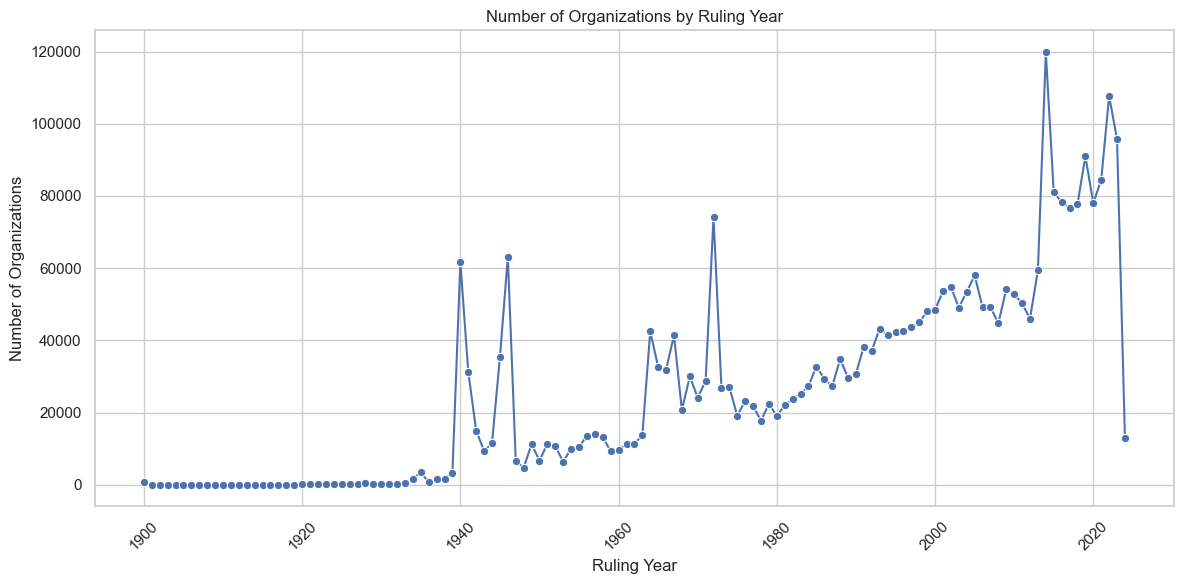

In [14]:
# Set plot style
sns.set(style="whitegrid")

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ruling_year, x='ruling_year', y='org_count', marker="o")

# Titles and labels
plt.title("Number of Organizations by Ruling Year")
plt.xlabel("Ruling Year")
plt.ylabel("Number of Organizations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
# SQL query to get top 15 cities by number of organizations
query = """
    SELECT city, COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE city IS NOT NULL AND city != ''
    GROUP BY city
    ORDER BY org_count DESC
    LIMIT 15;
"""
df_city = pd.read_sql(query, engine)

# Display the results
df_city.head(10)


,city,org_count
0,NEW YORK,43916
1,CHICAGO,39856
2,WASHINGTON,36465
3,HOUSTON,29660
4,LOS ANGELES,27868
5,BROOKLYN,23734
6,DALLAS,22379
7,PHILADELPHIA,18020
8,ATLANTA,17390
9,COLUMBUS,16388


/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/3408979358.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_city, x='org_count', y='city', palette="magma")


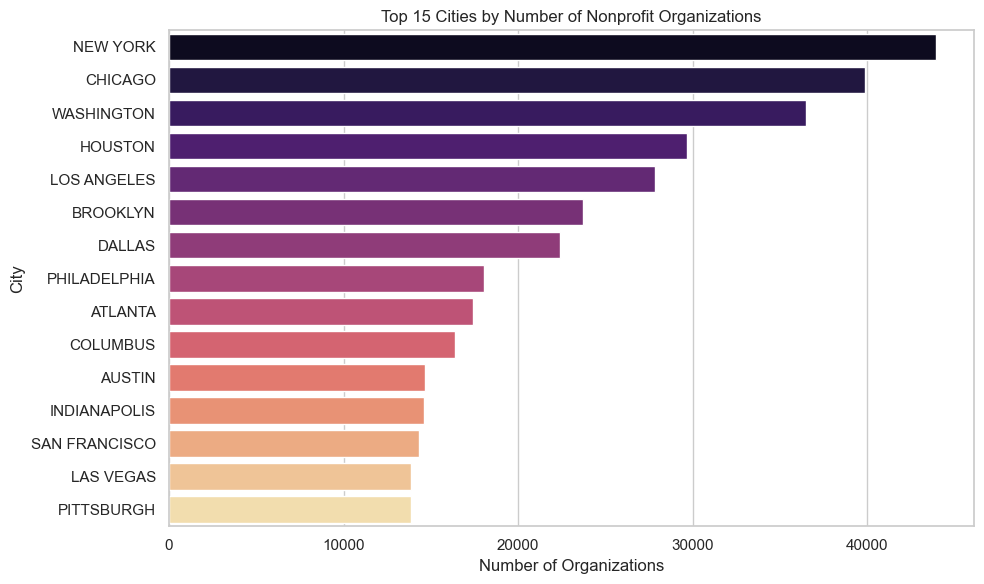

In [16]:
# Set plot style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_city, x='org_count', y='city', palette="magma")

# Add labels and title
plt.title("Top 15 Cities by Number of Nonprofit Organizations")
plt.xlabel("Number of Organizations")
plt.ylabel("City")
plt.tight_layout()
plt.show()


### Query and view top cities for a given state

In [17]:
# Define the state abbreviation (e.g., 'CA' for California)
target_state = 'CA'

# SQL query to get top 15 cities within the specified state
query = f"""
    SELECT city, COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE city IS NOT NULL AND city != ''
      AND state = '{target_state}'
    GROUP BY city
    ORDER BY org_count DESC
    LIMIT 15;
"""
df_city_state = pd.read_sql(query, engine)

# Show the result
df_city_state.head(10)


,city,org_count
0,LOS ANGELES,27868
1,SAN FRANCISCO,14308
2,SAN DIEGO,13265
3,SACRAMENTO,10551
4,SAN JOSE,8333
5,OAKLAND,6758
6,FRESNO,4663
7,LONG BEACH,4238
8,BAKERSFIELD,3535
9,IRVINE,3319


/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/1415753550.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_city_state, x='org_count', y='city', palette="coolwarm")


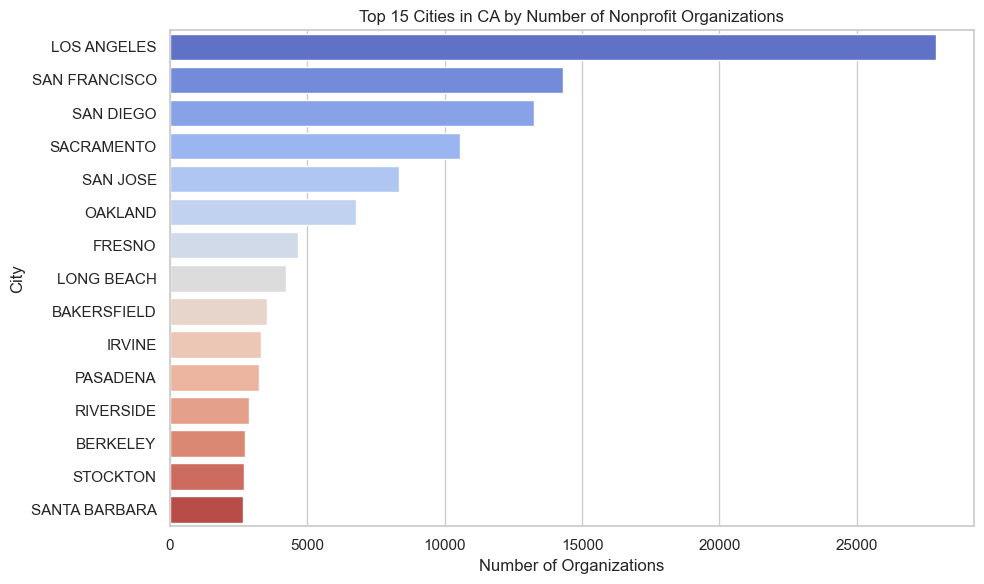

In [18]:
# Set plot style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_city_state, x='org_count', y='city', palette="coolwarm")

# Add title with state name
plt.title(f"Top 15 Cities in {target_state} by Number of Nonprofit Organizations")
plt.xlabel("Number of Organizations")
plt.ylabel("City")
plt.tight_layout()
plt.show()


### Query & View Revenue and Asset Data by Category

This visualization helps identify which categories are wealthiest by comparing their average revenue and assets side by side.

In [19]:
# SQL query to get average revenue and assets by top-level category
query = """
    SELECT nccs_level_1_category,
           AVG(total_revenue) AS avg_revenue,
           AVG(total_assets) AS avg_assets
    FROM nccs_bmf
    WHERE total_revenue IS NOT NULL AND total_assets IS NOT NULL
          AND nccs_level_1_category IS NOT NULL
    GROUP BY nccs_level_1_category
    ORDER BY avg_revenue DESC
    LIMIT 15;
"""
df_financials = pd.read_sql(query, engine)

# Preview the results
df_financials.head(10)


,nccs_level_1_category,avg_revenue,avg_assets
0,501C3 CHARITY,2.883985e+06,5.601252e+06
1,501CX NONPROFIT,1.790795e+06,6.503112e+06
2,UNDEFINED,4.124540e+05,1.757003e+06
3,501C3 PRIVATE FOUNDATION,3.274552e+05,1.156976e+06


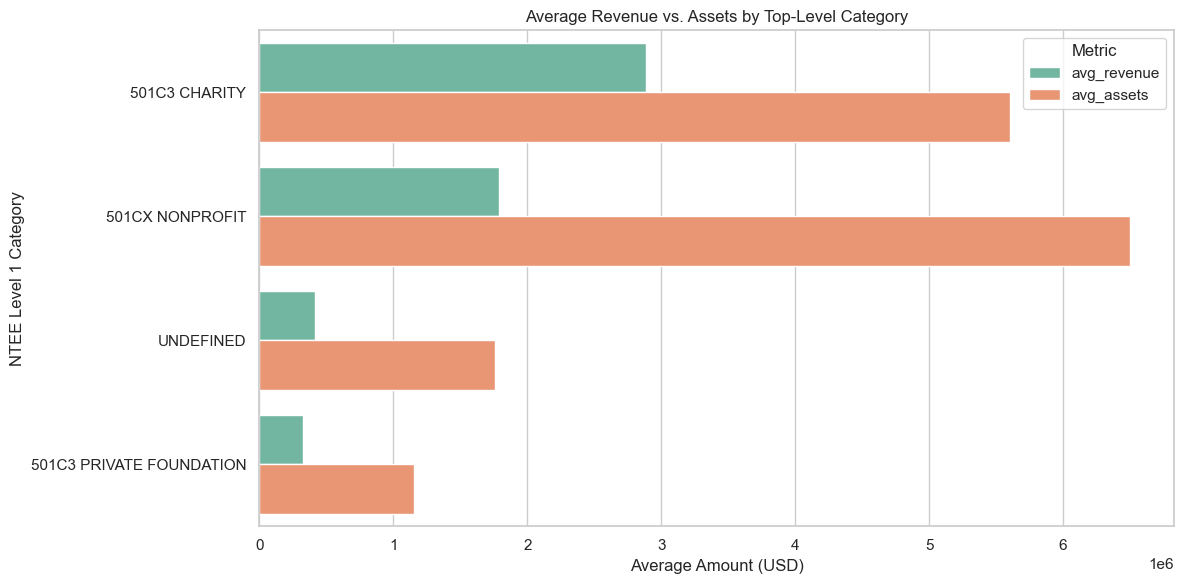

In [20]:
# Set plot style
sns.set(style="whitegrid")

# Reshape the data for seaborn
df_melted = df_financials.melt(id_vars='nccs_level_1_category',
                                value_vars=['avg_revenue', 'avg_assets'],
                                var_name='Metric', value_name='Amount')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted,
            x='Amount', y='nccs_level_1_category', hue='Metric', palette='Set2')

# Add titles and labels
plt.title("Average Revenue vs. Assets by Top-Level Category")
plt.xlabel("Average Amount (USD)")
plt.ylabel("NTEE Level 1 Category")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


**Let's dig deeper into financials**

In [21]:
# SQL query to fetch raw revenue and assets for categories with sufficient data
query = """
    SELECT nccs_level_1_category, total_revenue, total_assets
    FROM nccs_bmf
    WHERE nccs_level_1_category IS NOT NULL
      AND total_revenue IS NOT NULL AND total_assets IS NOT NULL
      AND total_revenue > 0 AND total_assets > 0
    LIMIT 50000;  -- Sample size for performance (adjust as needed)
"""
df_box = pd.read_sql(query, engine)

# Preview data
df_box.head()


,nccs_level_1_category,total_revenue,total_assets
0,501C3 CHARITY,22893.0,4226.0
1,501C3 CHARITY,53519.0,64699.0
2,501C3 CHARITY,12657777.0,9236818.0
3,501C3 CHARITY,806556.0,2248214.0
4,501C3 CHARITY,35000.0,21343.0


#### Boxplot (Log Scale) – Total Revenue by Category

/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/2084870752.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='total_revenue', y='nccs_level_1_category',


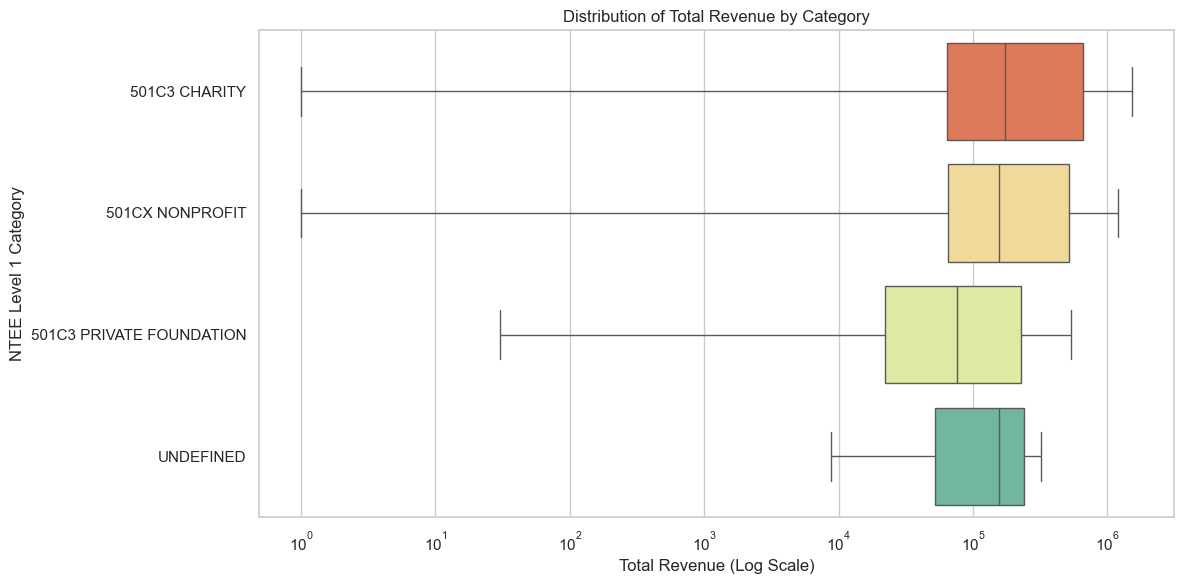

In [22]:
# Set style
sns.set(style="whitegrid")

# Boxplot for total revenue (log scale)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_box, x='total_revenue', y='nccs_level_1_category',
            showfliers=False, palette="Spectral")

plt.xscale("log")
plt.xlabel("Total Revenue (Log Scale)")
plt.ylabel("NTEE Level 1 Category")
plt.title("Distribution of Total Revenue by Category")
plt.tight_layout()
plt.show()


#### Boxplot (Log Scale) – Total Assets by Category

/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/2805421203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='total_assets', y='nccs_level_1_category',


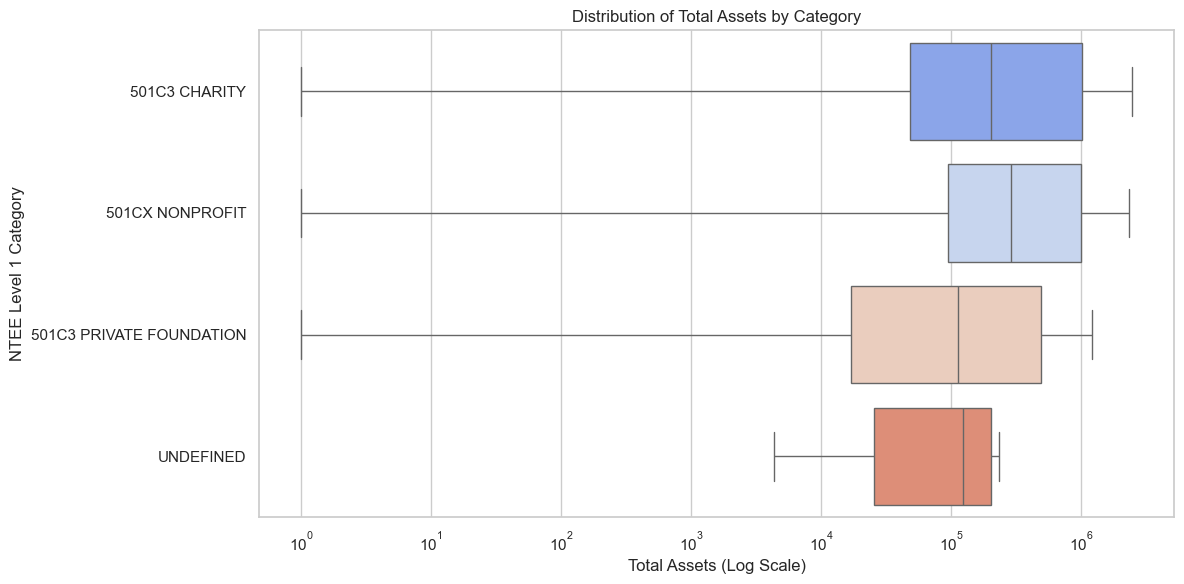

In [23]:
# Boxplot for total assets (log scale)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_box, x='total_assets', y='nccs_level_1_category',
            showfliers=False, palette="coolwarm")

plt.xscale("log")
plt.xlabel("Total Assets (Log Scale)")
plt.ylabel("NTEE Level 1 Category")
plt.title("Distribution of Total Assets by Category")
plt.tight_layout()
plt.show()


#### Filter by category

In [24]:
# Define the categories you want to include
selected_categories = ['501C3 CHARITY', '501C4 SOCIAL WELFARE', '501C6 BUSINESS LEAGUES']

# Format for SQL IN clause
formatted_list = ",".join(f"'{cat}'" for cat in selected_categories)

# SQL query
query = f"""
    SELECT nccs_level_1_category, total_revenue, total_assets
    FROM nccs_bmf
    WHERE nccs_level_1_category IN ({formatted_list})
      AND total_revenue IS NOT NULL AND total_assets IS NOT NULL
      AND total_revenue > 0 AND total_assets > 0
    LIMIT 30000;
"""
df_filtered = pd.read_sql(query, engine)

# Preview
df_filtered.head()


,nccs_level_1_category,total_revenue,total_assets
0,501C3 CHARITY,22893.0,4226.0
1,501C3 CHARITY,53519.0,64699.0
2,501C3 CHARITY,12657777.0,9236818.0
3,501C3 CHARITY,806556.0,2248214.0
4,501C3 CHARITY,35000.0,21343.0


#### Boxplot – Total Revenue (Log) for Selected Categories

/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/2830197696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='total_revenue', y='nccs_level_1_category',


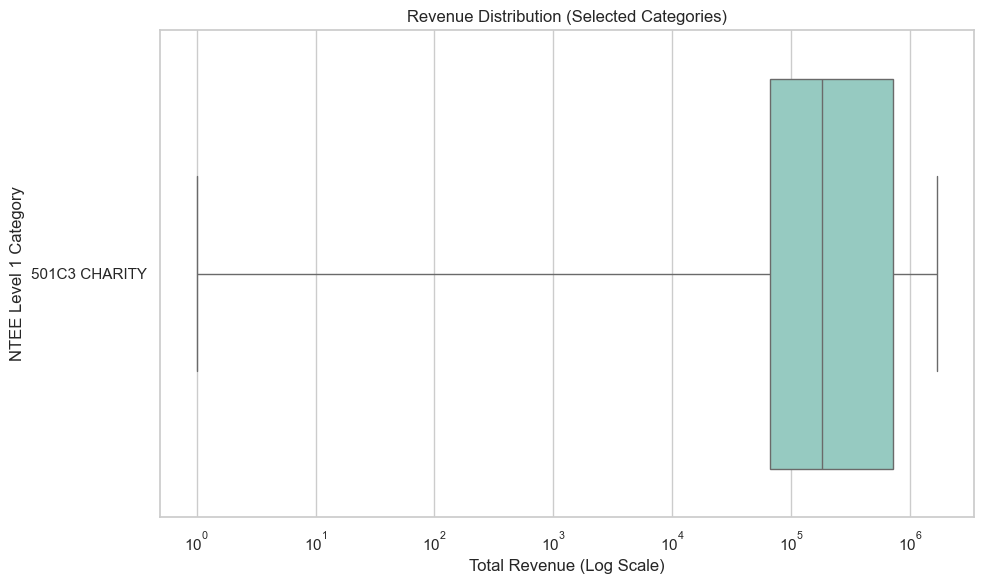

In [25]:
# Boxplot for revenue (log scale) for selected categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='total_revenue', y='nccs_level_1_category',
            showfliers=False, palette="Set3")

plt.xscale("log")
plt.xlabel("Total Revenue (Log Scale)")
plt.ylabel("NTEE Level 1 Category")
plt.title("Revenue Distribution (Selected Categories)")
plt.tight_layout()
plt.show()


#### Boxplot – Total Assets (Log) for Selected Categories

/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/3602294048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='total_assets', y='nccs_level_1_category',


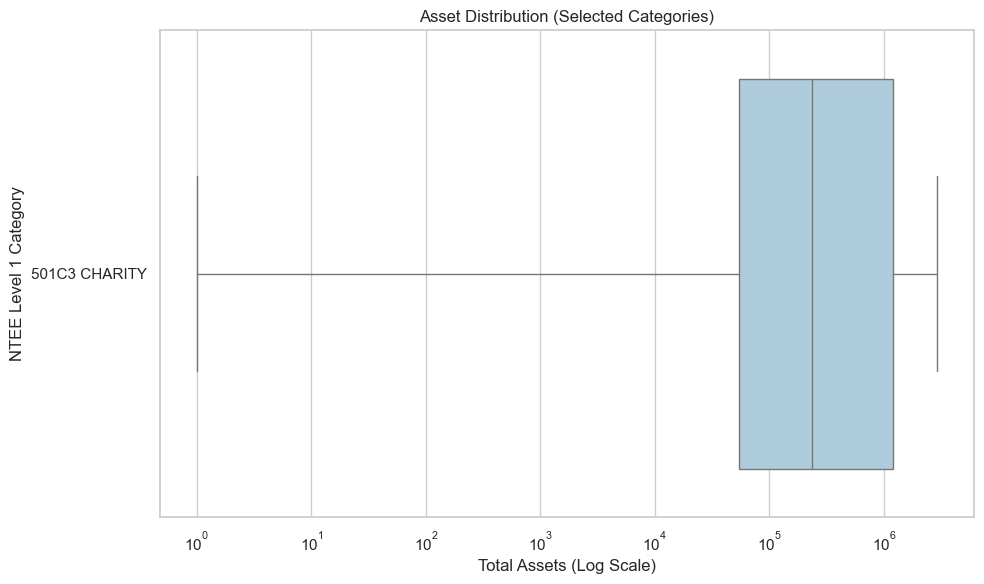

In [26]:
# Boxplot for assets (log scale) for selected categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='total_assets', y='nccs_level_1_category',
            showfliers=False, palette="Paired")

plt.xscale("log")
plt.xlabel("Total Assets (Log Scale)")
plt.ylabel("NTEE Level 1 Category")
plt.title("Asset Distribution (Selected Categories)")
plt.tight_layout()
plt.show()


### Query & Count Foundation Filing Status

In [27]:
# SQL query to count organizations by private foundation filing requirement
query = """
    SELECT 
        bmf_private_foundation_filing_required,
        COUNT(*) AS org_count
    FROM nccs_bmf
    GROUP BY bmf_private_foundation_filing_required
    ORDER BY org_count DESC;
"""
df_foundation = pd.read_sql(query, engine)

# Fill NULLs with a label for clarity
df_foundation['bmf_private_foundation_filing_required'] = df_foundation['bmf_private_foundation_filing_required'].fillna("Unknown")

# Preview
df_foundation.head()


,bmf_private_foundation_filing_required,org_count
0,0.0,1792936
1,Unknown,1493434
2,1.0,150334
3,3.0,237
4,2.0,21


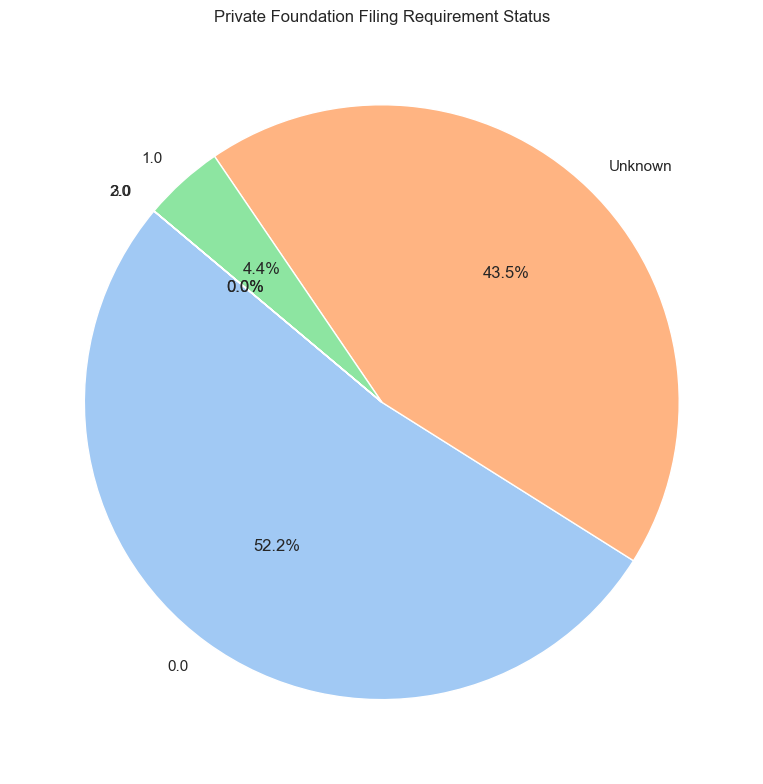

In [28]:
# Set plot style
plt.figure(figsize=(8, 8))
plt.pie(df_foundation['org_count'],
        labels=df_foundation['bmf_private_foundation_filing_required'],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("pastel"))

plt.title("Private Foundation Filing Requirement Status")
plt.tight_layout()
plt.show()


### Query Foundation Filing Status × Category
Let's cross-tab private foundation filing status with top-level nonprofit category (nccs_level_1_category). This helps reveal which types of organizations are more likely to be private foundations or exempt.

In [29]:
# SQL query: count combinations of category and filing requirement
query = """
    SELECT 
        nccs_level_1_category,
        bmf_private_foundation_filing_required,
        COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE nccs_level_1_category IS NOT NULL
    GROUP BY nccs_level_1_category, bmf_private_foundation_filing_required
    ORDER BY org_count DESC;
"""
df_cross = pd.read_sql(query, engine)

# Fill NULLs
df_cross['bmf_private_foundation_filing_required'] = df_cross['bmf_private_foundation_filing_required'].fillna("Unknown")


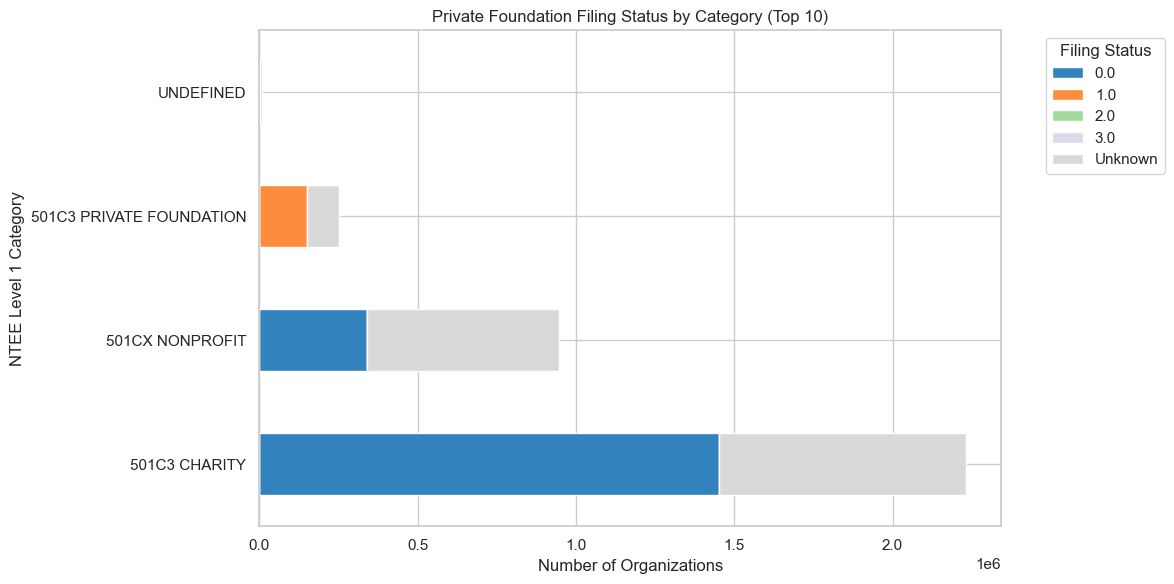

In [30]:
# Pivot for stacked bar
pivot_df = df_cross.pivot(index='nccs_level_1_category',
                          columns='bmf_private_foundation_filing_required',
                          values='org_count').fillna(0)

# Sort by total orgs
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).head(10).index]

# Plot
pivot_df.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='tab20c')

plt.title("Private Foundation Filing Status by Category (Top 10)")
plt.xlabel("Number of Organizations")
plt.ylabel("NTEE Level 1 Category")
plt.legend(title="Filing Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Query Foundation Filing Status × State
Let’s cross-tabulate private foundation filing requirement by state, so we can see how filing behavior varies geographically.

In [31]:
# SQL query to count combinations of state and filing requirement
query = """
    SELECT 
        state,
        bmf_private_foundation_filing_required,
        COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE state IS NOT NULL
    GROUP BY state, bmf_private_foundation_filing_required
    ORDER BY org_count DESC;
"""
df_cross_state = pd.read_sql(query, engine)

# Fill NULLs for status
df_cross_state['bmf_private_foundation_filing_required'] = df_cross_state['bmf_private_foundation_filing_required'].fillna("Unknown")


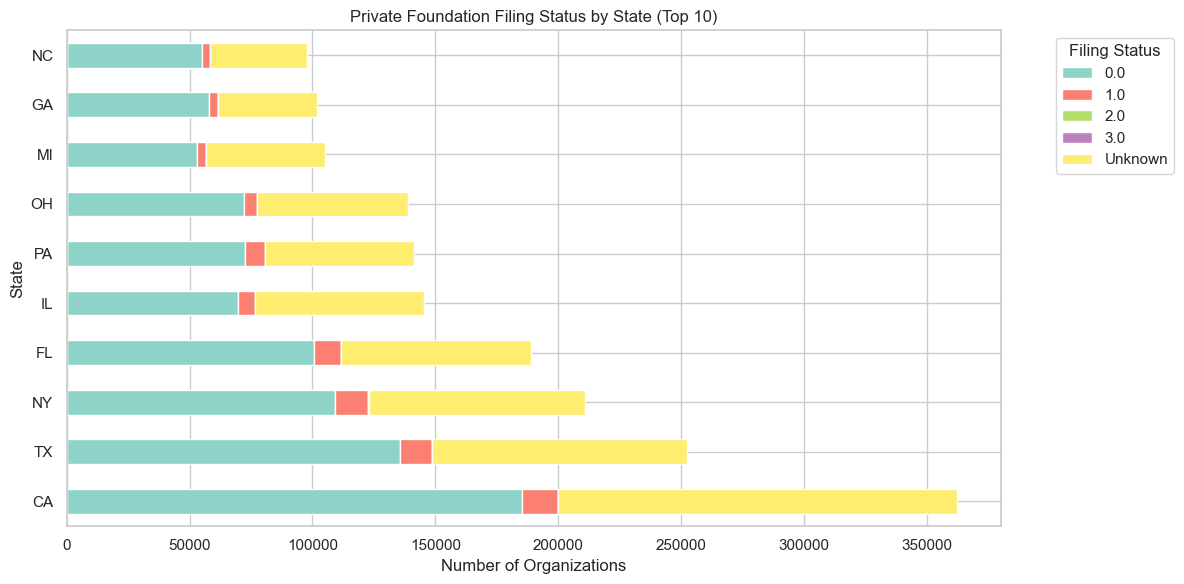

In [32]:
# Pivot the data for stacked bar plot
pivot_state = df_cross_state.pivot(index='state',
                                   columns='bmf_private_foundation_filing_required',
                                   values='org_count').fillna(0)

# Select top 10 states by total organization count
top_states = pivot_state.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_state = pivot_state.loc[top_states]

# Plot
pivot_state.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='Set3')

plt.title("Private Foundation Filing Status by State (Top 10)")
plt.xlabel("Number of Organizations")
plt.ylabel("State")
plt.legend(title="Filing Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Query Deductibility Code Counts
let’s visualize the distribution of nonprofits based on their deductibility status, using the column bmf_deductibility_code.

This code typically indicates:
- Whether contributions to the organization are tax-deductible for donors
- The rules under which deductibility applies

In [33]:
# SQL query to count number of orgs by deductibility code
query = """
    SELECT 
        bmf_deductibility_code,
        COUNT(*) AS org_count
    FROM nccs_bmf
    GROUP BY bmf_deductibility_code
    ORDER BY org_count DESC;
"""
df_deduct = pd.read_sql(query, engine)

# Replace NULLs for display
df_deduct['bmf_deductibility_code'] = df_deduct['bmf_deductibility_code'].fillna("Unknown")

# Preview
df_deduct.head()


,bmf_deductibility_code,org_count
0,1.0,1657994
1,Unknown,1493434
2,2.0,249894
3,0.0,35088
4,4.0,552


/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/422192565.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_deduct, x='org_count', y='label', palette='crest')


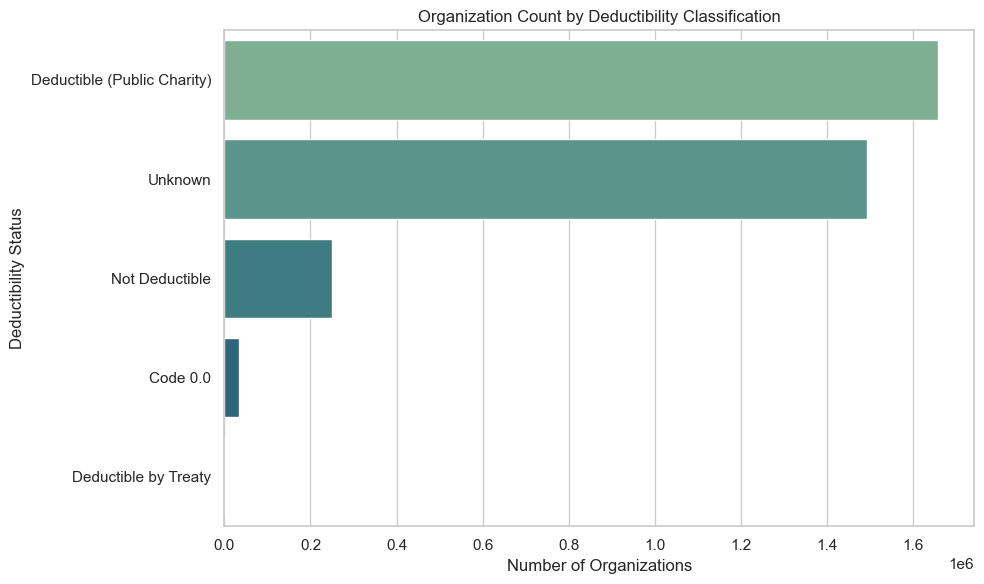

In [35]:
# Mapping codes to human-friendly labels
deduct_map = {
    1: "Deductible (Public Charity)",
    2: "Not Deductible",
    4: "Deductible by Treaty",
    5: "Limited Deductibility",
    6: "Special Rules Apply",
    7: "Check Group Ruling",
    9: "Governmental",
    "Unknown": "Unknown"
}

# Apply mapping
df_deduct['label'] = df_deduct['bmf_deductibility_code'].apply(lambda x: deduct_map.get(x, f"Code {x}"))

# Plot with readable labels
plt.figure(figsize=(10, 6))
sns.barplot(data=df_deduct, x='org_count', y='label', palette='crest')

plt.title("Organization Count by Deductibility Classification")
plt.xlabel("Number of Organizations")
plt.ylabel("Deductibility Status")
plt.tight_layout()
plt.show()


### Query Deductibility Code × Category

In [36]:
# SQL query to count combinations of category and deductibility code
query = """
    SELECT 
        nccs_level_1_category,
        bmf_deductibility_code,
        COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE nccs_level_1_category IS NOT NULL
    GROUP BY nccs_level_1_category, bmf_deductibility_code
    ORDER BY org_count DESC;
"""
df_deduct_cat = pd.read_sql(query, engine)

# Fill and map codes
deduct_map = {
    1: "Deductible (Public Charity)",
    2: "Not Deductible",
    4: "Deductible by Treaty",
    5: "Limited Deductibility",
    6: "Special Rules Apply",
    7: "Check Group Ruling",
    9: "Governmental",
    None: "Unknown"
}
df_deduct_cat['bmf_deductibility_code'] = df_deduct_cat['bmf_deductibility_code'].fillna("Unknown")
df_deduct_cat['label'] = df_deduct_cat['bmf_deductibility_code'].apply(lambda x: deduct_map.get(x, f"Code {x}"))


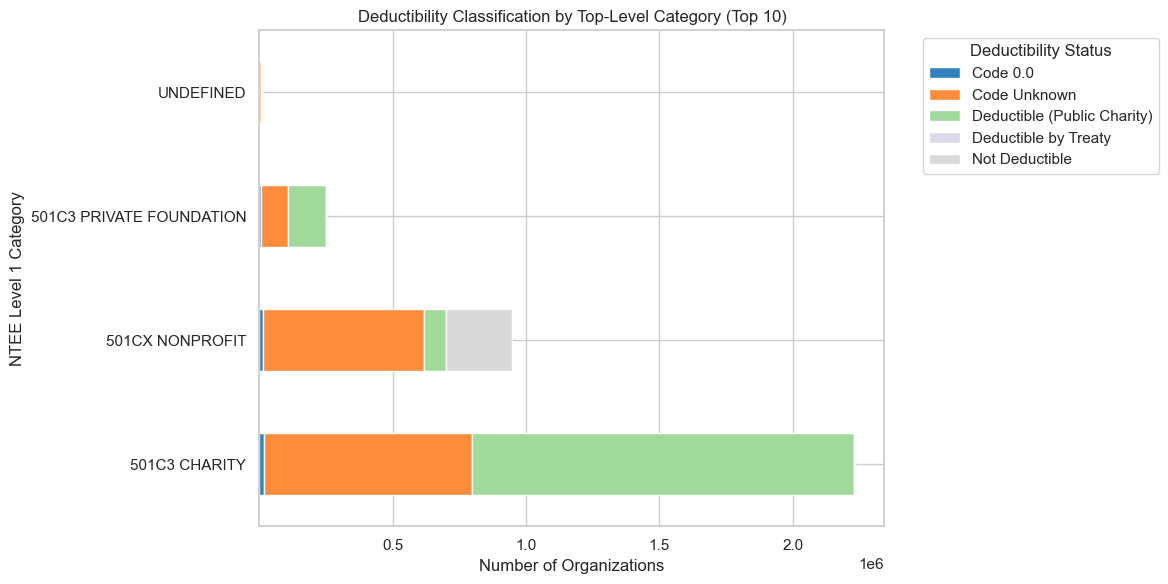

In [37]:
# Pivot and sort top categories
pivot_cat = df_deduct_cat.pivot(index='nccs_level_1_category',
                                 columns='label',
                                 values='org_count').fillna(0)

top_cats = pivot_cat.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_cat = pivot_cat.loc[top_cats]

# Plot
pivot_cat.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='tab20c')

plt.title("Deductibility Classification by Top-Level Category (Top 10)")
plt.xlabel("Number of Organizations")
plt.ylabel("NTEE Level 1 Category")
plt.legend(title="Deductibility Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Query Deductibility Code × State

In [38]:
# SQL query to count combinations of state and deductibility code
query = """
    SELECT 
        state,
        bmf_deductibility_code,
        COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE state IS NOT NULL
    GROUP BY state, bmf_deductibility_code
    ORDER BY org_count DESC;
"""
df_deduct_state = pd.read_sql(query, engine)

# Map and fill labels
df_deduct_state['bmf_deductibility_code'] = df_deduct_state['bmf_deductibility_code'].fillna("Unknown")
df_deduct_state['label'] = df_deduct_state['bmf_deductibility_code'].apply(lambda x: deduct_map.get(x, f"Code {x}"))


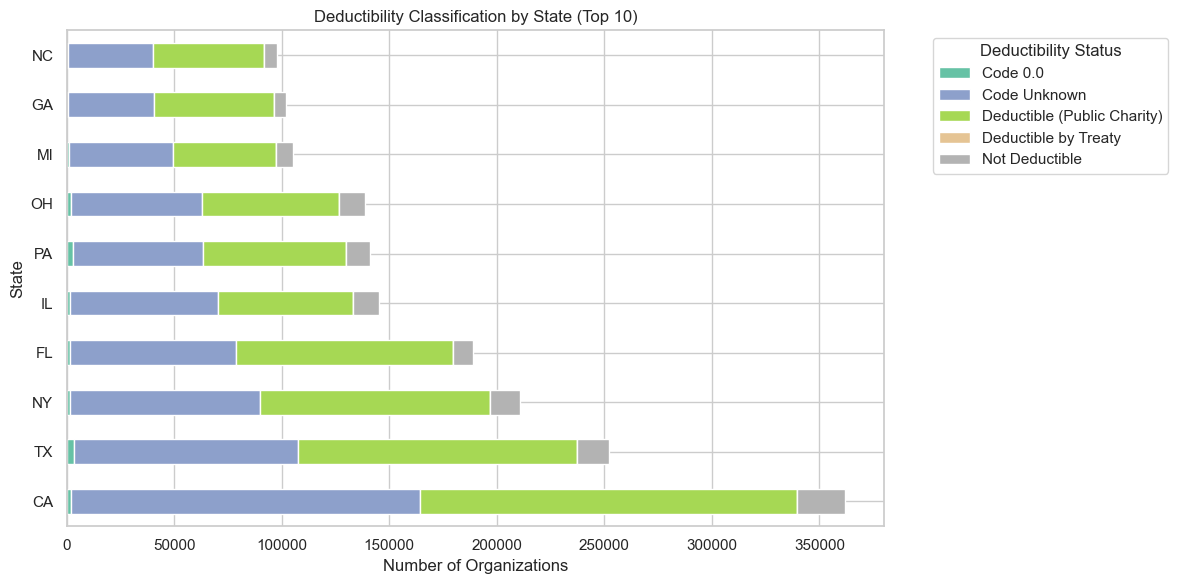

In [39]:
# Pivot and filter top states
pivot_state = df_deduct_state.pivot(index='state',
                                     columns='label',
                                     values='org_count').fillna(0)

top_states = pivot_state.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_state = pivot_state.loc[top_states]

# Plot
pivot_state.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='Set2')

plt.title("Deductibility Classification by State (Top 10)")
plt.xlabel("Number of Organizations")
plt.ylabel("State")
plt.legend(title="Deductibility Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Query and View Longevity Data

In [41]:
query = """
    SELECT 
        TIMESTAMPDIFF(YEAR, organization_first_year, organization_last_year) AS org_lifespan
    FROM nccs_bmf
    WHERE organization_first_year IS NOT NULL
      AND organization_last_year IS NOT NULL
      AND organization_last_year >= organization_first_year
    LIMIT 50000;
"""
df_lifespan = pd.read_sql(query, engine)
df_lifespan.head()


,org_lifespan
0,5
1,35
2,29
3,29
4,29


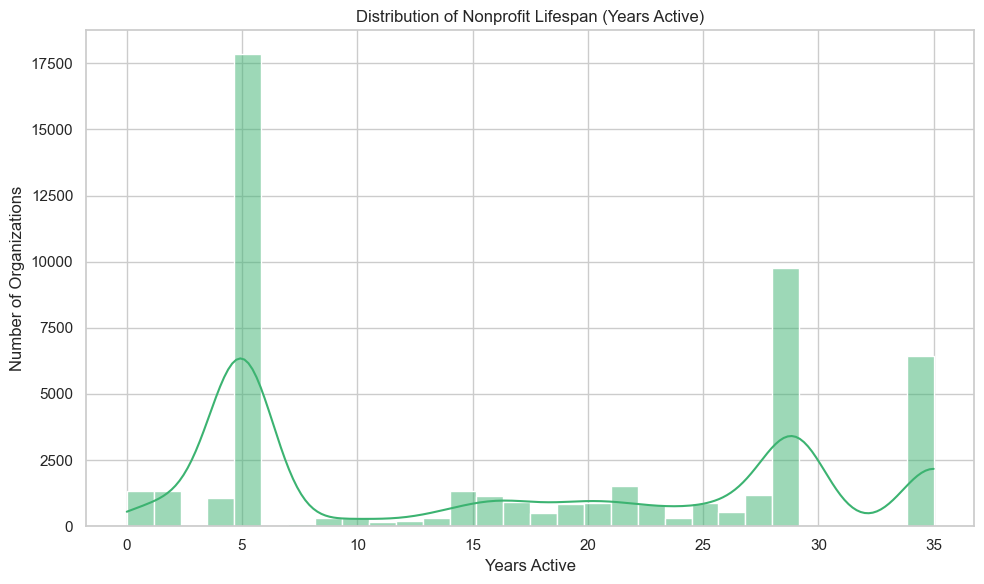

In [42]:
# Plot distribution of calculated lifespans
plt.figure(figsize=(10, 6))
sns.histplot(data=df_lifespan,
             x='org_lifespan',
             bins=30,
             kde=True,
             color='mediumseagreen')

plt.title("Distribution of Nonprofit Lifespan (Years Active)")
plt.xlabel("Years Active")
plt.ylabel("Number of Organizations")
plt.tight_layout()
plt.show()


### Query – Lifespan × Category × State × Foundation Status

In [43]:
# Query to calculate lifespan and pull categorical variables
query = """
    SELECT 
        TIMESTAMPDIFF(YEAR, organization_first_year, organization_last_year) AS org_lifespan,
        nccs_level_1_category,
        state,
        bmf_private_foundation_filing_required
    FROM nccs_bmf
    WHERE organization_first_year IS NOT NULL
      AND organization_last_year IS NOT NULL
      AND organization_last_year >= organization_first_year
      AND TIMESTAMPDIFF(YEAR, organization_first_year, organization_last_year) BETWEEN 0 AND 100
    LIMIT 50000;
"""
df_lifespan_full = pd.read_sql(query, engine)

# Fill in missing labels
df_lifespan_full['bmf_private_foundation_filing_required'] = df_lifespan_full['bmf_private_foundation_filing_required'].fillna("Unknown")


#### Boxplot – Lifespan by Category

/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/1141915780.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_lifespan_full,


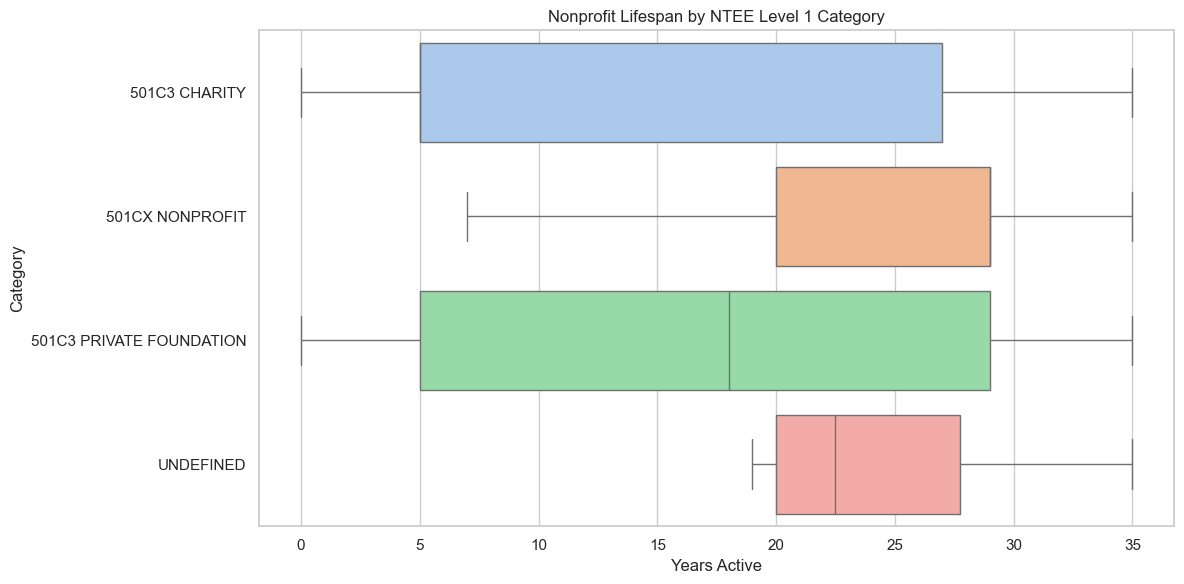

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_lifespan_full,
            x='org_lifespan',
            y='nccs_level_1_category',
            showfliers=False,
            palette='pastel')

plt.title("Nonprofit Lifespan by NTEE Level 1 Category")
plt.xlabel("Years Active")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


#### Boxplot – Lifespan by State (Top 10)

/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/1017655817.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_states,


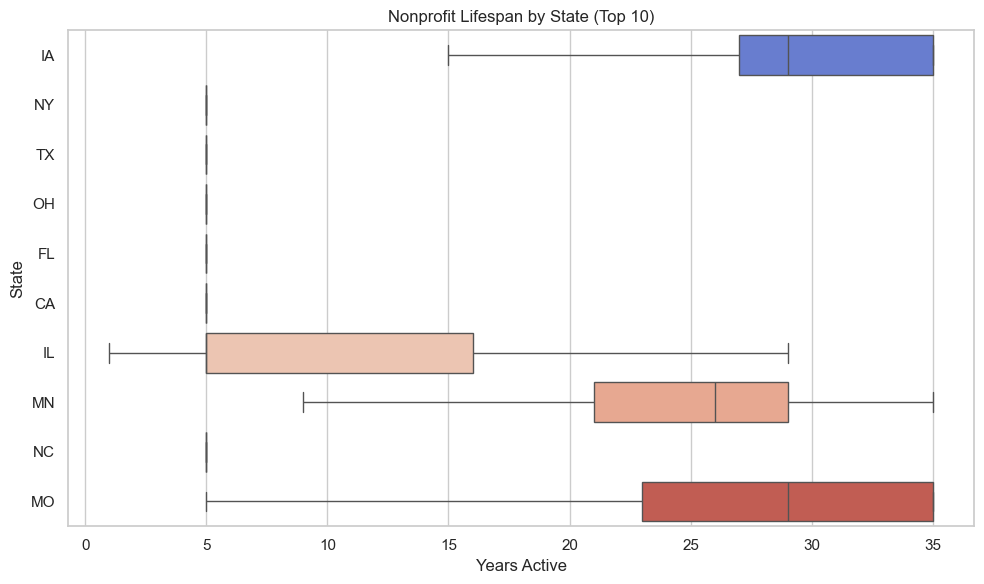

In [45]:
# Focus on top 10 states by total orgs
top_states = df_lifespan_full['state'].value_counts().head(10).index
df_top_states = df_lifespan_full[df_lifespan_full['state'].isin(top_states)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_states,
            x='org_lifespan',
            y='state',
            showfliers=False,
            palette='coolwarm')

plt.title("Nonprofit Lifespan by State (Top 10)")
plt.xlabel("Years Active")
plt.ylabel("State")
plt.tight_layout()
plt.show()


#### Boxplot – Lifespan by Foundation Filing Requirement

/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/2936333161.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_lifespan_full,


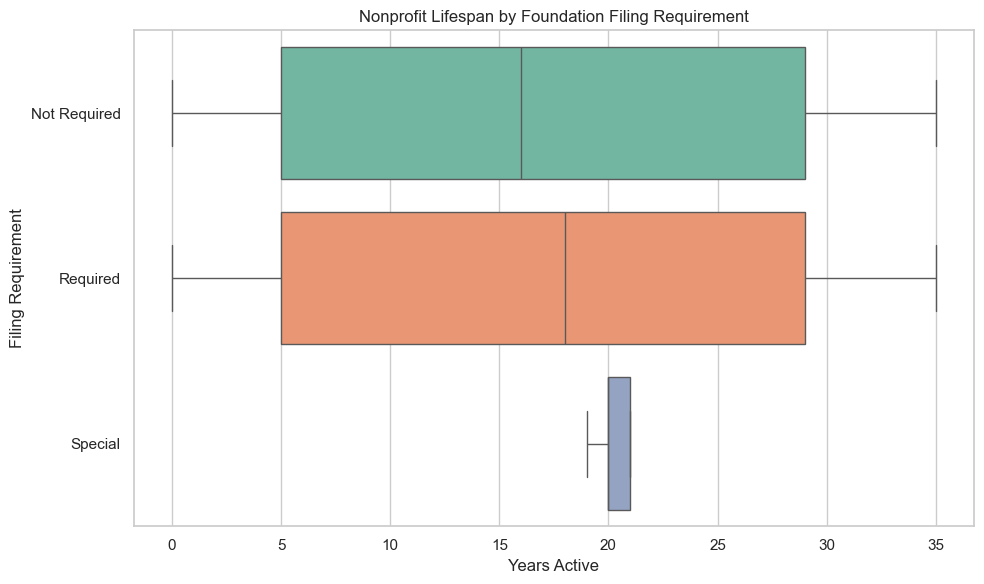

In [46]:
# Format labels
foundation_labels = {
    0: "Not Required",
    1: "Required",
    2: "Conditional",
    3: "Special",
    "Unknown": "Unknown"
}
df_lifespan_full['foundation_label'] = df_lifespan_full['bmf_private_foundation_filing_required'].apply(
    lambda x: foundation_labels.get(x, f"Code {x}")
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_lifespan_full,
            x='org_lifespan',
            y='foundation_label',
            showfliers=False,
            palette='Set2')

plt.title("Nonprofit Lifespan by Foundation Filing Requirement")
plt.xlabel("Years Active")
plt.ylabel("Filing Requirement")
plt.tight_layout()
plt.show()


### Organization Count by State × Ruling Year

In [47]:
query = """
    SELECT 
        state,
        YEAR(organization_ruling_date) AS ruling_year,
        COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE state IS NOT NULL
      AND organization_ruling_date IS NOT NULL
    GROUP BY state, ruling_year
    ORDER BY ruling_year, state;
"""
df_state_year = pd.read_sql(query, engine)

# Preview
df_state_year.head()


,state,ruling_year,org_count
0,AL,1900,8
1,AR,1900,1
2,AZ,1900,3
3,CA,1900,22
4,CT,1900,2


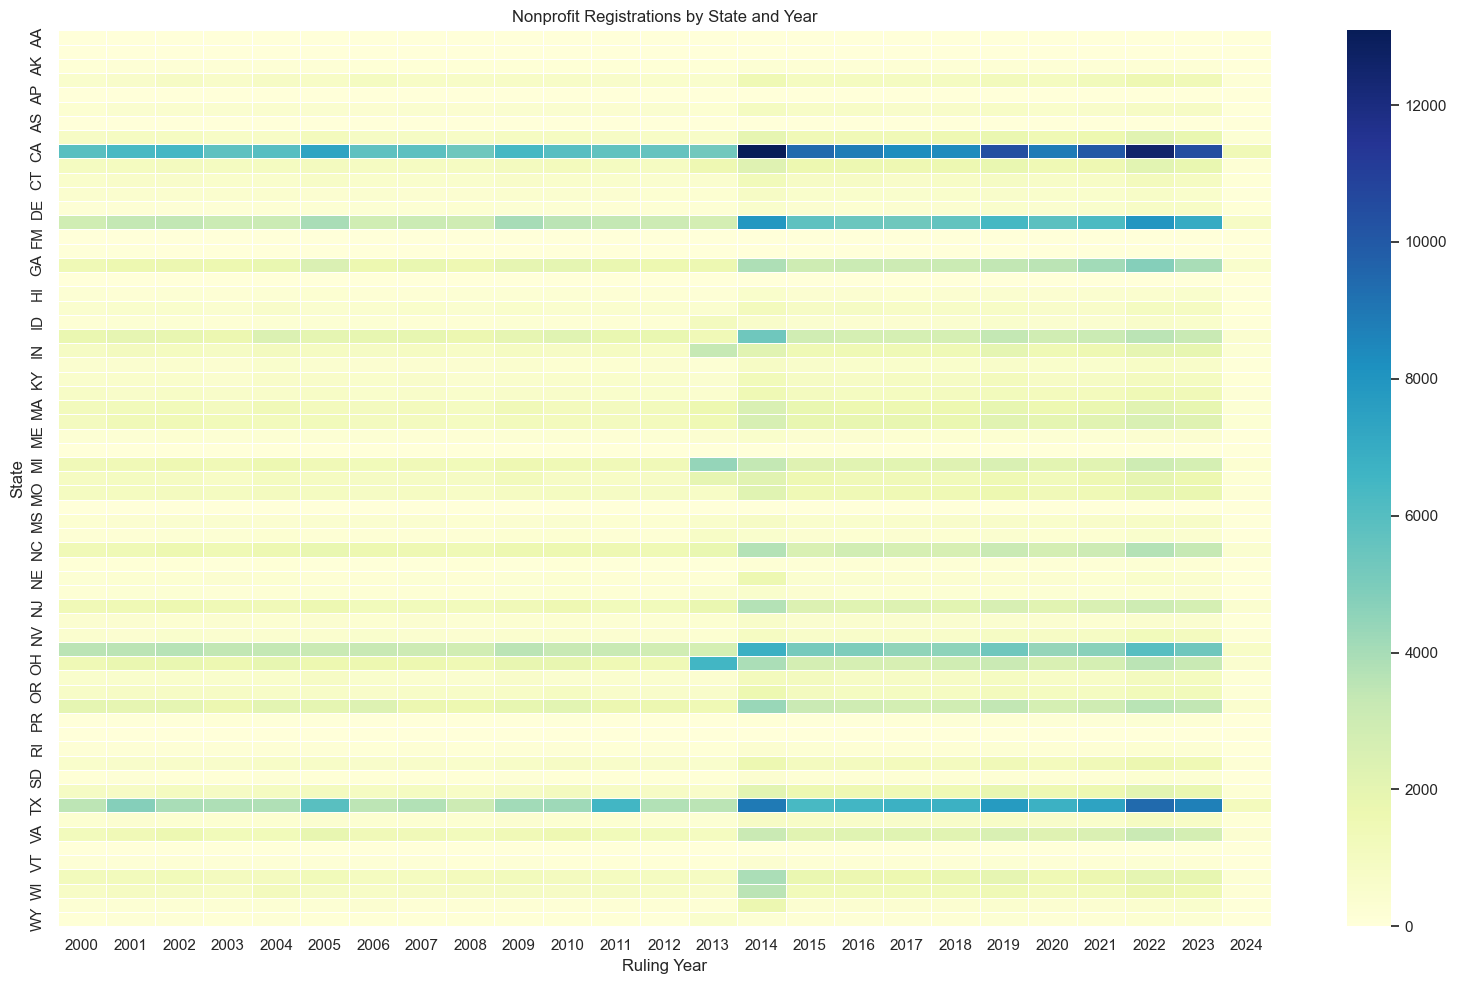

In [48]:
# Pivot for heatmap: rows = state, columns = year
heatmap_df = df_state_year.pivot(index="state", columns="ruling_year", values="org_count").fillna(0)

# Focus on recent years only if needed (e.g., last 25)
if heatmap_df.shape[1] > 25:
    heatmap_df = heatmap_df.iloc[:, -25:]

# Plot
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_df, cmap="YlGnBu", linewidths=0.5)

plt.title("Nonprofit Registrations by State and Year")
plt.xlabel("Ruling Year")
plt.ylabel("State")
plt.tight_layout()
plt.show()


### Organization Count by CBSA × Year
Let’s now create a CBSA (Core-Based Statistical Area) × Year heatmap, which visualizes how nonprofit registrations have changed over time across major metro regions.

This visualization helps you identify:
- Which metro areas have growing nonprofit sectors
- Which years saw spikes in new org registrations

In [49]:
query = """
    SELECT 
        census_cbsa_name,
        YEAR(organization_ruling_date) AS ruling_year,
        COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE census_cbsa_name IS NOT NULL
      AND organization_ruling_date IS NOT NULL
    GROUP BY census_cbsa_name, ruling_year
    ORDER BY ruling_year, census_cbsa_name;
"""
df_cbsa_year = pd.read_sql(query, engine)

# Preview
df_cbsa_year.head()


,census_cbsa_name,ruling_year,org_count
0,"Albuquerque, NM",1900,3
1,"Alpena, MI",1900,1
2,"Amarillo, TX",1900,1
3,"Atlanta-Sandy Springs-Alpharetta, GA",1900,1
4,"Augusta-Richmond County, GA-SC",1900,1


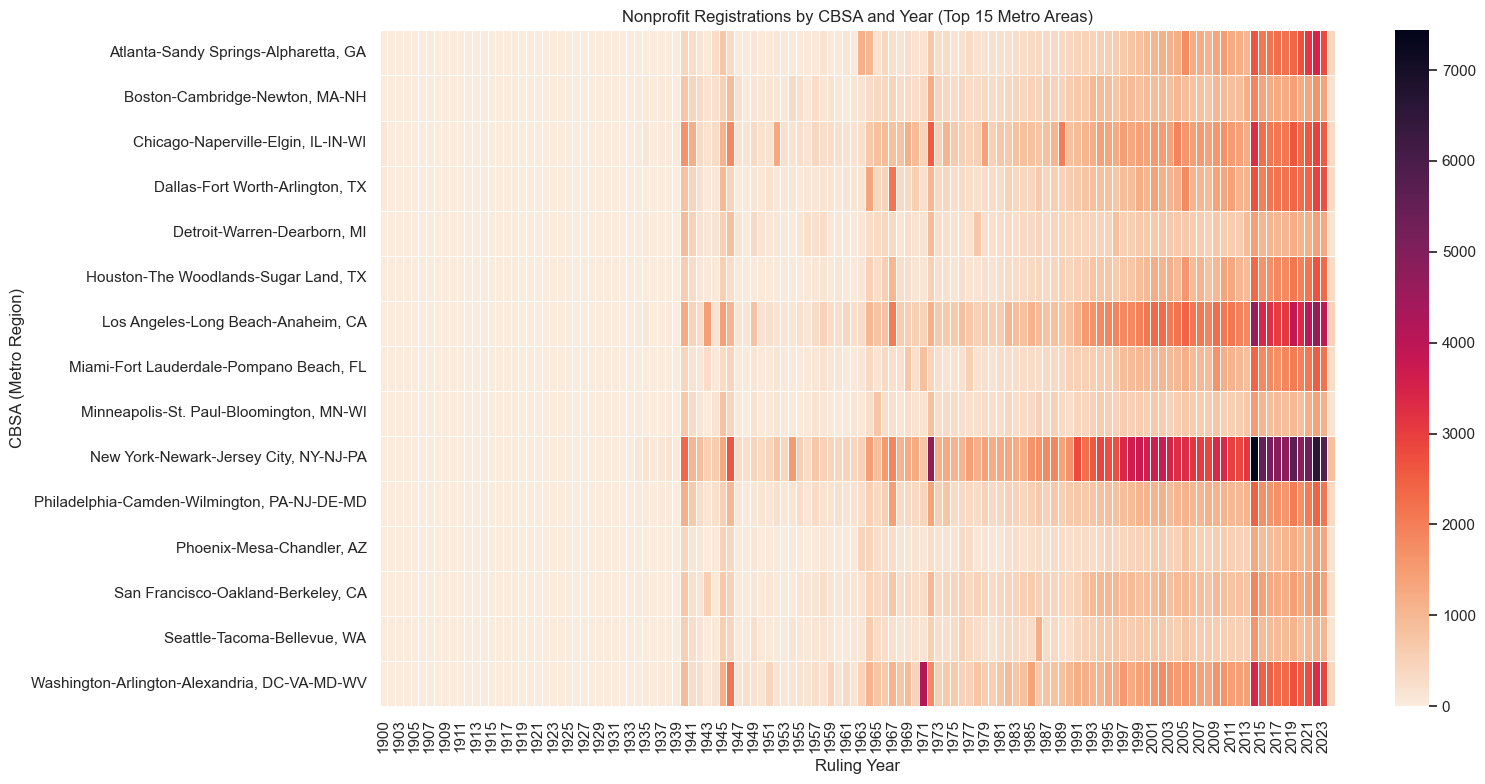

In [50]:
# Focus on top 15 CBSAs by total org count
top_cbsas = df_cbsa_year.groupby('census_cbsa_name')['org_count'].sum().sort_values(ascending=False).head(15).index
df_top_cbsa = df_cbsa_year[df_cbsa_year['census_cbsa_name'].isin(top_cbsas)]

# Pivot
heatmap_cbsa = df_top_cbsa.pivot(index="census_cbsa_name", columns="ruling_year", values="org_count").fillna(0)

# Plot
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_cbsa, cmap="rocket_r", linewidths=0.5)

plt.title("Nonprofit Registrations by CBSA and Year (Top 15 Metro Areas)")
plt.xlabel("Ruling Year")
plt.ylabel("CBSA (Metro Region)")
plt.tight_layout()
plt.show()


### Avg Income by NTEE Modern Code

In [60]:
modern_code_labels = {
    "MMB-Y33-RG": "Military/Veterans Relief",
    "PSB-R25-RG": "Law Enforcement Support",
    "HEL-E22-PA": "Health Research: Respiratory",
    "HEL-E31-RG": "Health – Group Health",
    "HOS-E21-RG": "Hospitals – General",
    "MMB-Y25-RG": "Military/Veterans Hospitals",
    "IFA-Q38-RG": "International Disaster Relief",
    "MMB-Y30-RG": "Military Welfare Services",
    "UNI-B43-RG": "University Support",
    "ENV-D40-RG": "Pollution Abatement",
    "MMB-Y43-RG": "Military Family Services",
    "HEL-H42-RG": "Health – Vision",
    "HOS-E22-RG": "Hospitals – Specialized",
    "MMB-Y44-RG": "Military Veterans Associations",
    "HEL-E31-NS": "Health – Group Health (NS)",
    "HEL-E80-RG": "Health – Public Health",
    "UNI-B42-RG": "University Systems",
    "HEL-E20-MM": "Health – General and Rehabilitative",
    "PSB-S50-RG": "Public Safety Education",
    "HEL-H81-RG": "Health – Nursing Services"
}


In [61]:
query = """
    SELECT 
        ntee_modern_code,
        AVG(total_income) AS avg_income
    FROM nccs_bmf
    WHERE total_income IS NOT NULL
      AND ntee_modern_code IS NOT NULL
    GROUP BY ntee_modern_code
    ORDER BY avg_income DESC
    LIMIT 20;
"""
df_income_modern = pd.read_sql(query, engine)

# Preview
df_income_modern.head()


,ntee_modern_code,avg_income
0,MMB-Y33-RG,3.345805e+09
1,PSB-R25-RG,2.086947e+08
2,HEL-E22-PA,1.921686e+08
3,HEL-E31-RG,1.388560e+08
4,HOS-E21-RG,1.165644e+08


In [62]:
# Map labels to modern codes
df_income_modern['label'] = df_income_modern['ntee_modern_code'].apply(
    lambda x: modern_code_labels.get(x, x)
)


/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/2951925897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_income_modern,


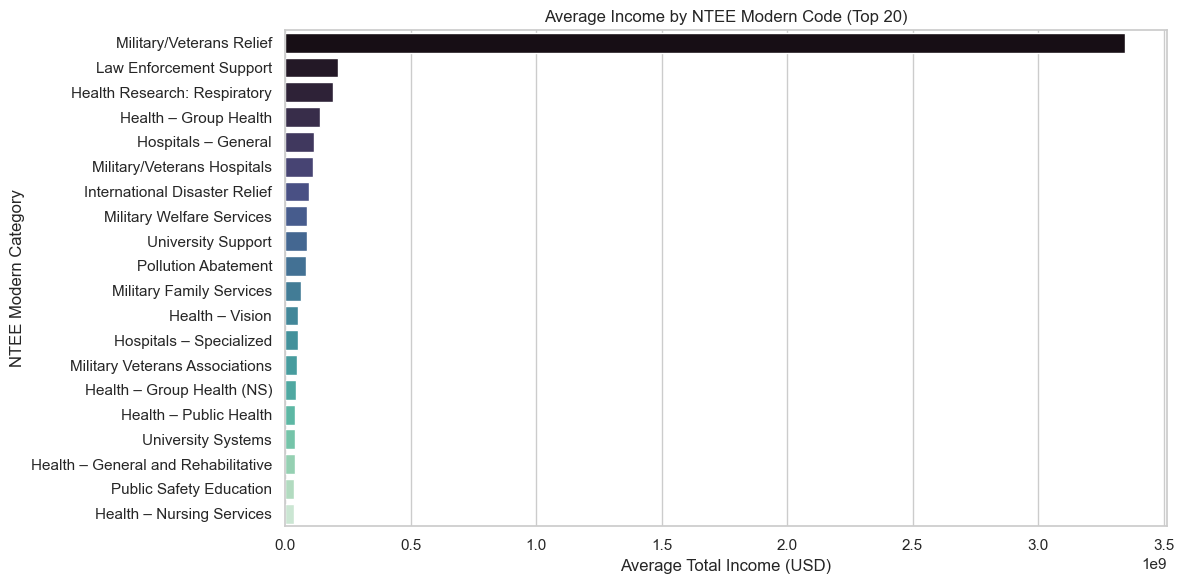

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_income_modern,
            x='avg_income', y='label',
            palette='mako')

plt.title("Average Income by NTEE Modern Code (Top 20)")
plt.xlabel("Average Total Income (USD)")
plt.ylabel("NTEE Modern Category")
plt.tight_layout()
plt.show()


#### Broader Domain Categories

In [64]:
modern_code_domains = {
    "MMB-Y33-RG": "Military",
    "PSB-R25-RG": "Public Safety",
    "HEL-E22-PA": "Health",
    "HEL-E31-RG": "Health",
    "HOS-E21-RG": "Health",
    "MMB-Y25-RG": "Military",
    "IFA-Q38-RG": "International",
    "MMB-Y30-RG": "Military",
    "UNI-B43-RG": "Education",
    "ENV-D40-RG": "Environment",
    "MMB-Y43-RG": "Military",
    "HEL-H42-RG": "Health",
    "HOS-E22-RG": "Health",
    "MMB-Y44-RG": "Military",
    "HEL-E31-NS": "Health",
    "HEL-E80-RG": "Health",
    "UNI-B42-RG": "Education",
    "HEL-E20-MM": "Health",
    "PSB-S50-RG": "Public Safety",
    "HEL-H81-RG": "Health"
}


In [65]:
# Add domain group to each row
df_income_modern['domain'] = df_income_modern['ntee_modern_code'].apply(
    lambda x: modern_code_domains.get(x, "Other")
)


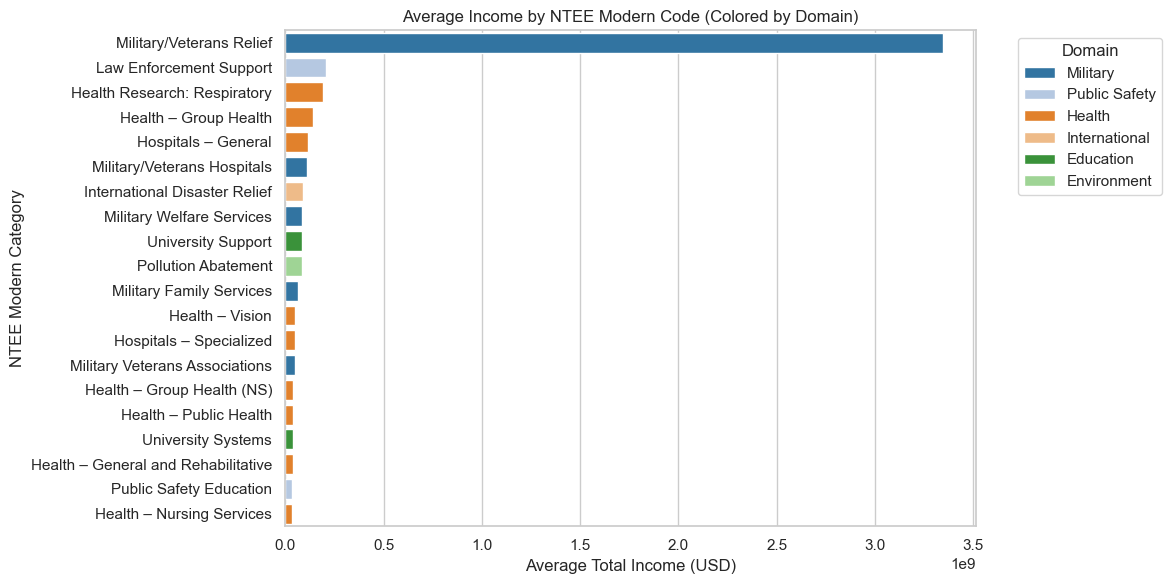

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_income_modern,
            x='avg_income', y='label',
            hue='domain', dodge=False, palette='tab20')

plt.title("Average Income by NTEE Modern Code (Colored by Domain)")
plt.xlabel("Average Total Income (USD)")
plt.ylabel("NTEE Modern Category")
plt.legend(title="Domain", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [67]:
# Group by domain and compute average income
df_domain_avg = df_income_modern.groupby('domain', as_index=False)['avg_income'].mean()

# Sort for plotting
df_domain_avg = df_domain_avg.sort_values(by='avg_income', ascending=False)

# Preview
df_domain_avg


,domain,avg_income
4,Military,7.313221e+08
5,Public Safety,1.223307e+08
3,International,9.297200e+07
1,Environment,8.434225e+07
2,Health,7.787653e+07
0,Education,6.180292e+07


/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/4208476257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_domain_avg, x='avg_income', y='domain', palette='viridis')


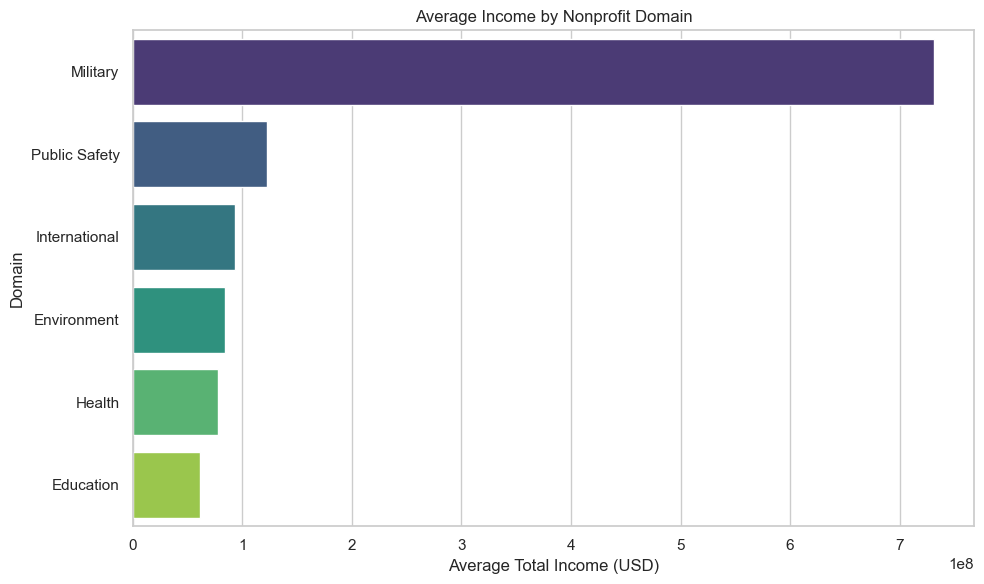

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_domain_avg, x='avg_income', y='domain', palette='viridis')

plt.title("Average Income by Nonprofit Domain")
plt.xlabel("Average Total Income (USD)")
plt.ylabel("Domain")
plt.tight_layout()
plt.show()


### Basic scatterplot on a map

In [51]:
query = """
    SELECT latitude, longitude, nccs_level_1_category
    FROM nccs_bmf
    WHERE latitude IS NOT NULL
      AND longitude IS NOT NULL
      AND latitude BETWEEN 24 AND 50
      AND longitude BETWEEN -125 AND -65
    LIMIT 10000;  -- Adjust for performance
"""
df_geo = pd.read_sql(query, engine)

# Preview
df_geo.head()


,latitude,longitude,nccs_level_1_category
0,34.83,-82.30,501C3 CHARITY
1,42.49,-96.40,501C3 CHARITY
2,41.58,-93.67,501CX NONPROFIT
3,41.58,-93.67,501CX NONPROFIT
4,41.58,-93.67,501CX NONPROFIT


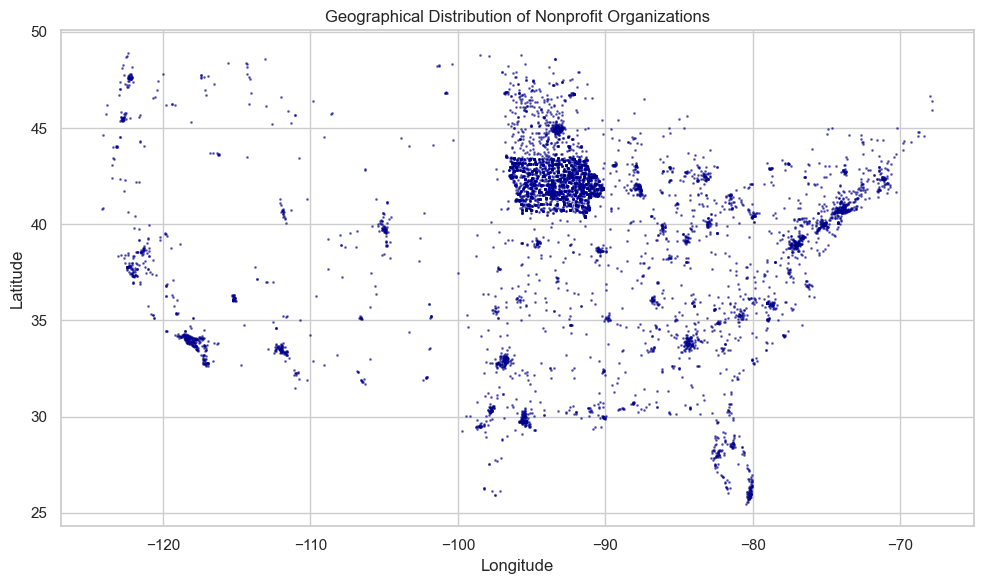

In [52]:
import matplotlib.pyplot as plt

# Plot setup
plt.figure(figsize=(10, 6))
plt.scatter(df_geo['longitude'], df_geo['latitude'], s=1, alpha=0.5, color='darkblue')

plt.title("Geographical Distribution of Nonprofit Organizations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()
